In [2]:
import pandas as pd
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer

file_path = 'BPI_Challenge_2012.xes'

In [3]:
log = xes_importer.apply(file_path)

In [4]:
print(log[0]) #prints the first trace of the log
print(len(log[0]))
print(log[0][0]) #prints the first event of the first trace

{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173688', 'AMOUNT_REQ': '20000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10629', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 13, 10, 37, 37, 26000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}
26
{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 0, 38, 44, 546000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}


In [5]:
print(log[1]) #prints the first trace of the log
print(len(log[1]))

{'attributes': {'REG_DATE': datetime.datetime(2011, 10, 1, 8, 8, 58, 256000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200))), 'concept:name': '173691', 'AMOUNT_REQ': '5000'}, 'events': [{'org:resource': '112', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'A_SUBMITTED', 'time:timestamp': datetime.datetime(2011, 10, 1, 8, 8, 58, 256000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}, '..', {'org:resource': '10809', 'lifecycle:transition': 'COMPLETE', 'concept:name': 'W_Valideren aanvraag', 'time:timestamp': datetime.datetime(2011, 10, 10, 14, 17, 34, 633000, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200)))}]}
39


In [6]:
print(type(log[1]))

<class 'pm4py.objects.log.obj.Trace'>


In [7]:
log[1].attributes['concept:name']

'173691'

In [8]:
counter = [(trace.attributes['concept:name'], len(trace)) for trace in log]

In [9]:
len_events = [item[1] for item in counter]

In [10]:
n_traces = len(log)
n_eventos = sum(len_events)
max_eventos = max(len_events)
min_eventos = min(len_events)

In [11]:
print(f'Total de casos: {n_traces}')
print(f'Total de eventos: {n_eventos}')
print(f'Eventos por caso: Mínimo {min_eventos}  Máximo {max_eventos}  Média {n_eventos / n_traces:0.2f}')

Total de casos: 13087
Total de eventos: 262200
Eventos por caso: Mínimo 3  Máximo 175  Média 20.04


In [12]:
#Exibir o comprimento de alguns traces
import random
sampled_lens = random.sample(len_events, 20)
print(sampled_lens)

[24, 3, 24, 34, 87, 7, 22, 6, 46, 41, 3, 3, 32, 6, 28, 3, 3, 3, 3, 6]


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

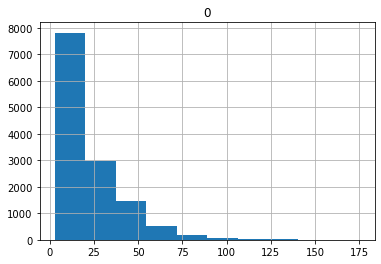

In [13]:
#Histograma do comprimento dos traces
df = pd.DataFrame(len_events)
df.hist()

In [14]:
start_activities = pm4py.get_start_activities(log)
end_activities = pm4py.get_end_activities(log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

Start activities: {'A_SUBMITTED': 13087}
End activities: {'W_Valideren aanvraag': 2747, 'W_Wijzigen contractgegevens': 4, 'A_DECLINED': 3429, 'W_Completeren aanvraag': 1939, 'A_CANCELLED': 655, 'W_Nabellen incomplete dossiers': 452, 'W_Afhandelen leads': 2234, 'W_Nabellen offertes': 1290, 'W_Beoordelen fraude': 57, 'O_CANCELLED': 279, 'A_REGISTERED': 1}


In [17]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

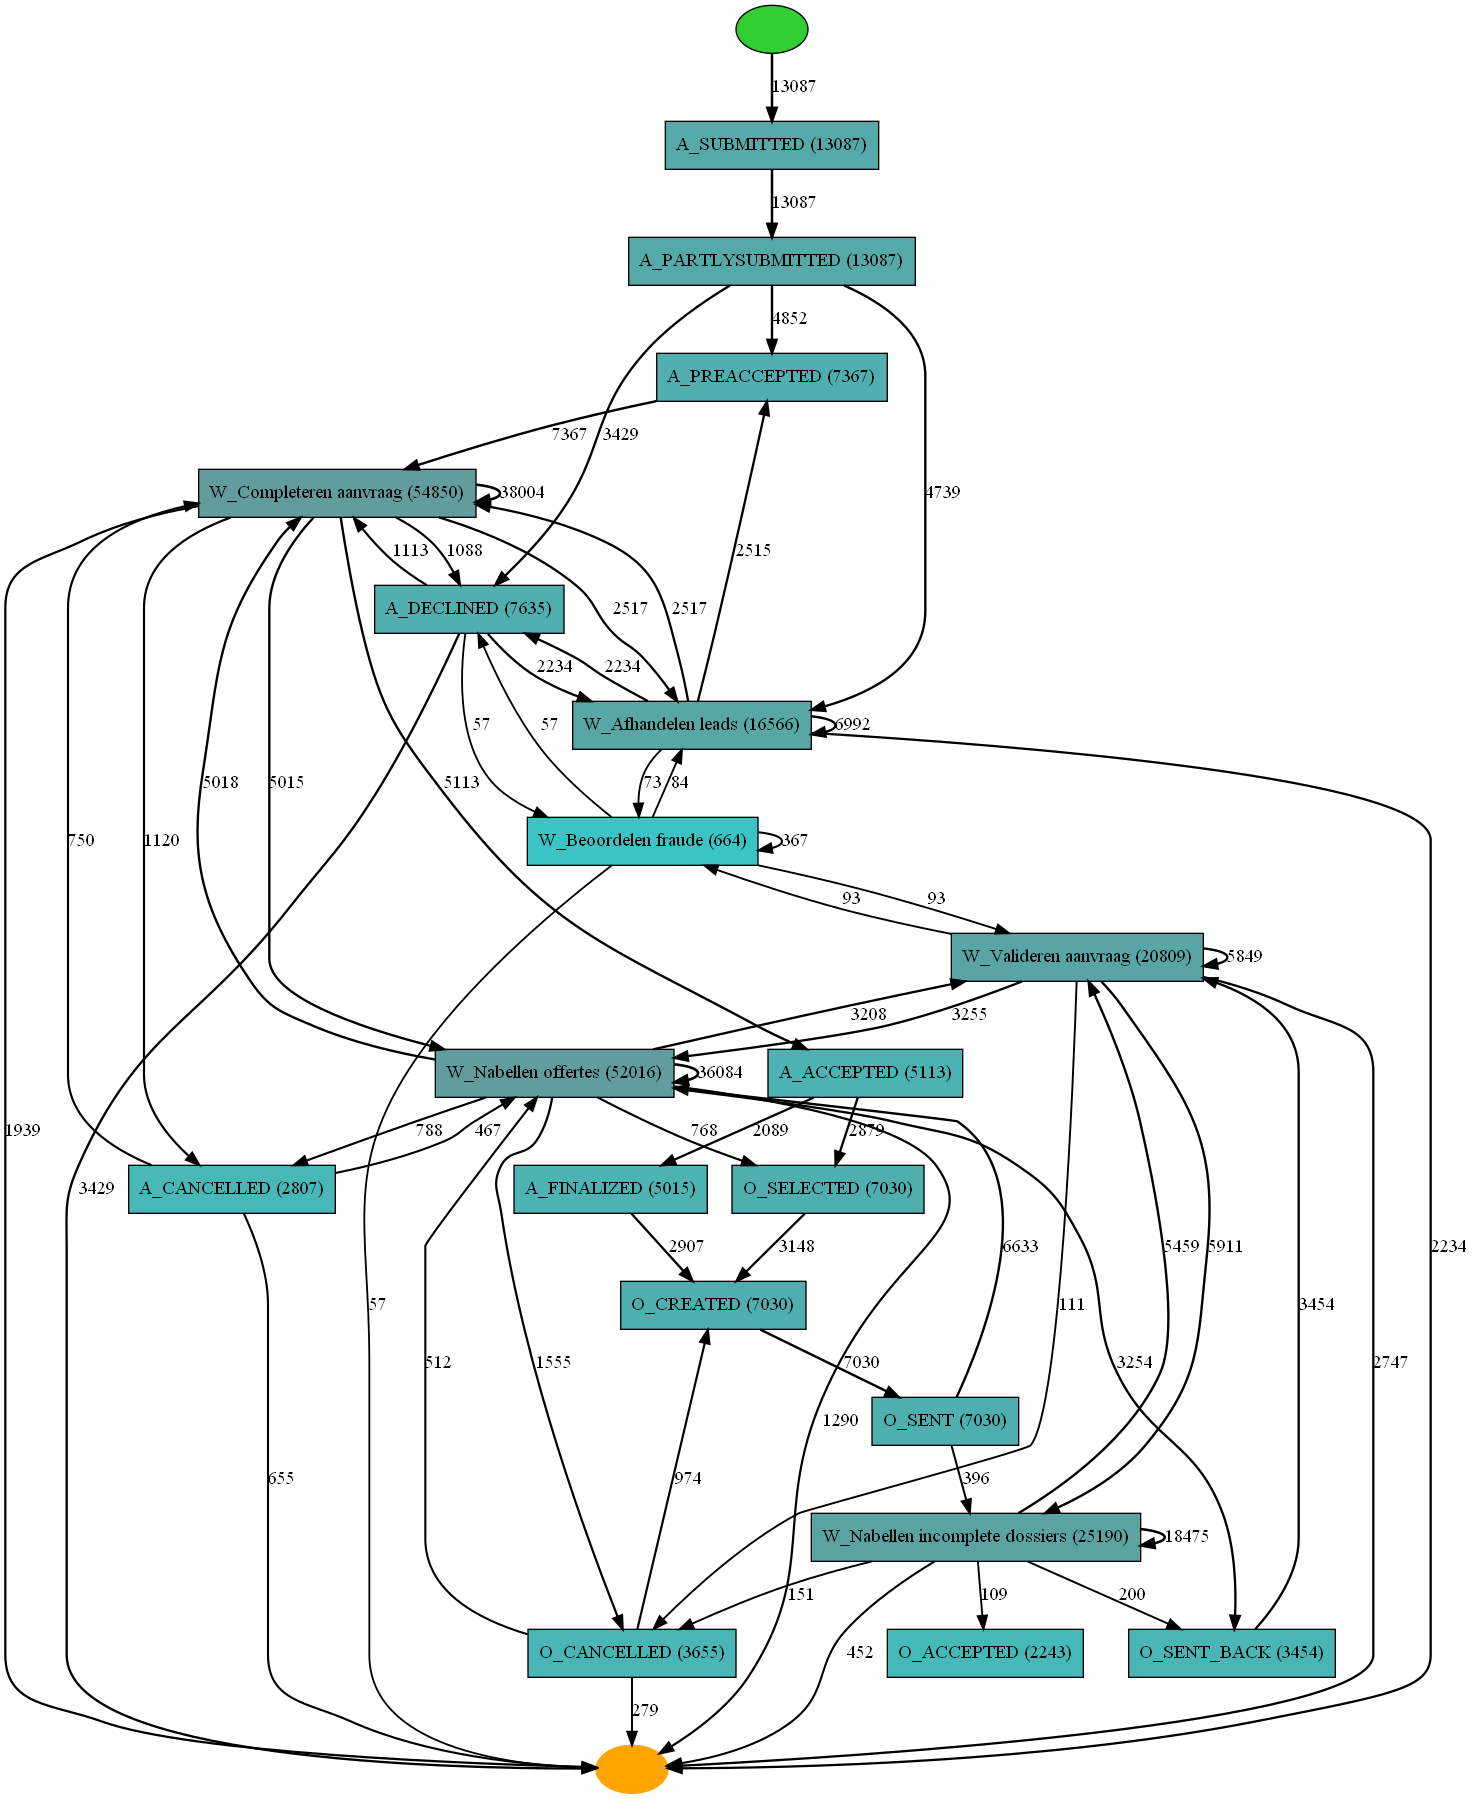

In [18]:
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)

C:\Users\25052288840\Anaconda3\lib\site-packages\pm4py\visualization\petrinet\__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")
<ipython-input-19-e60844e4e8af>:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking)


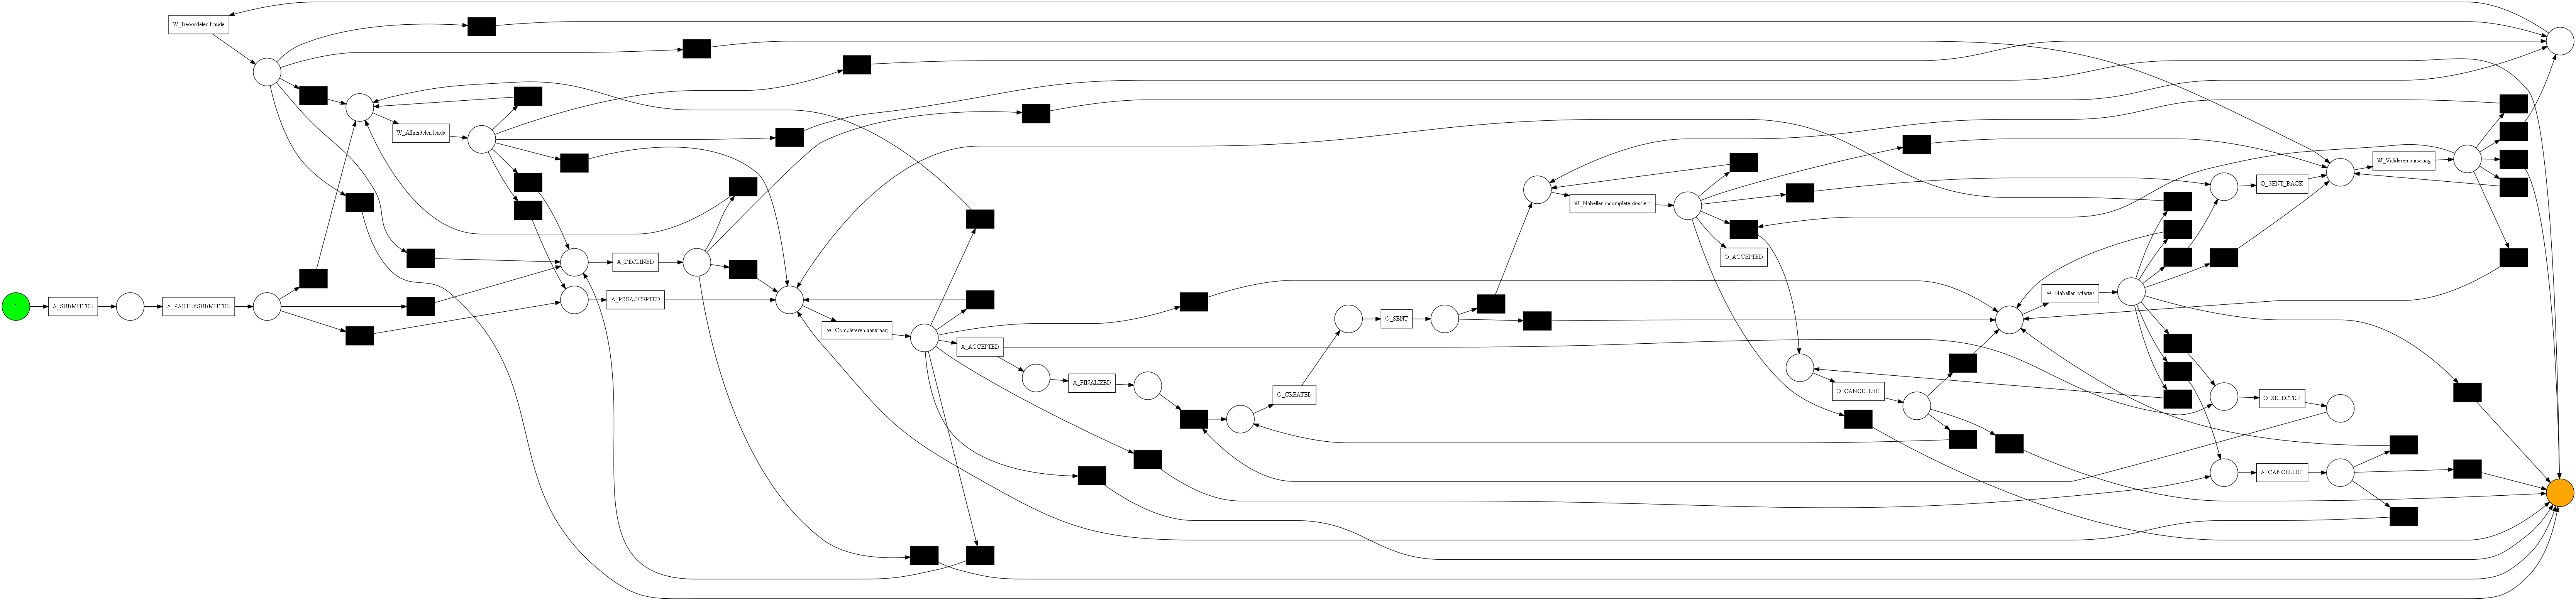

In [19]:
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
petri_net, initial_marking, final_marking = heuristics_miner.apply(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})

from pm4py.visualization.petrinet import visualizer as pn_visualizer
gviz = pn_visualizer.apply(petri_net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [20]:
process_tree = pm4py.discover_process_tree_inductive(log)

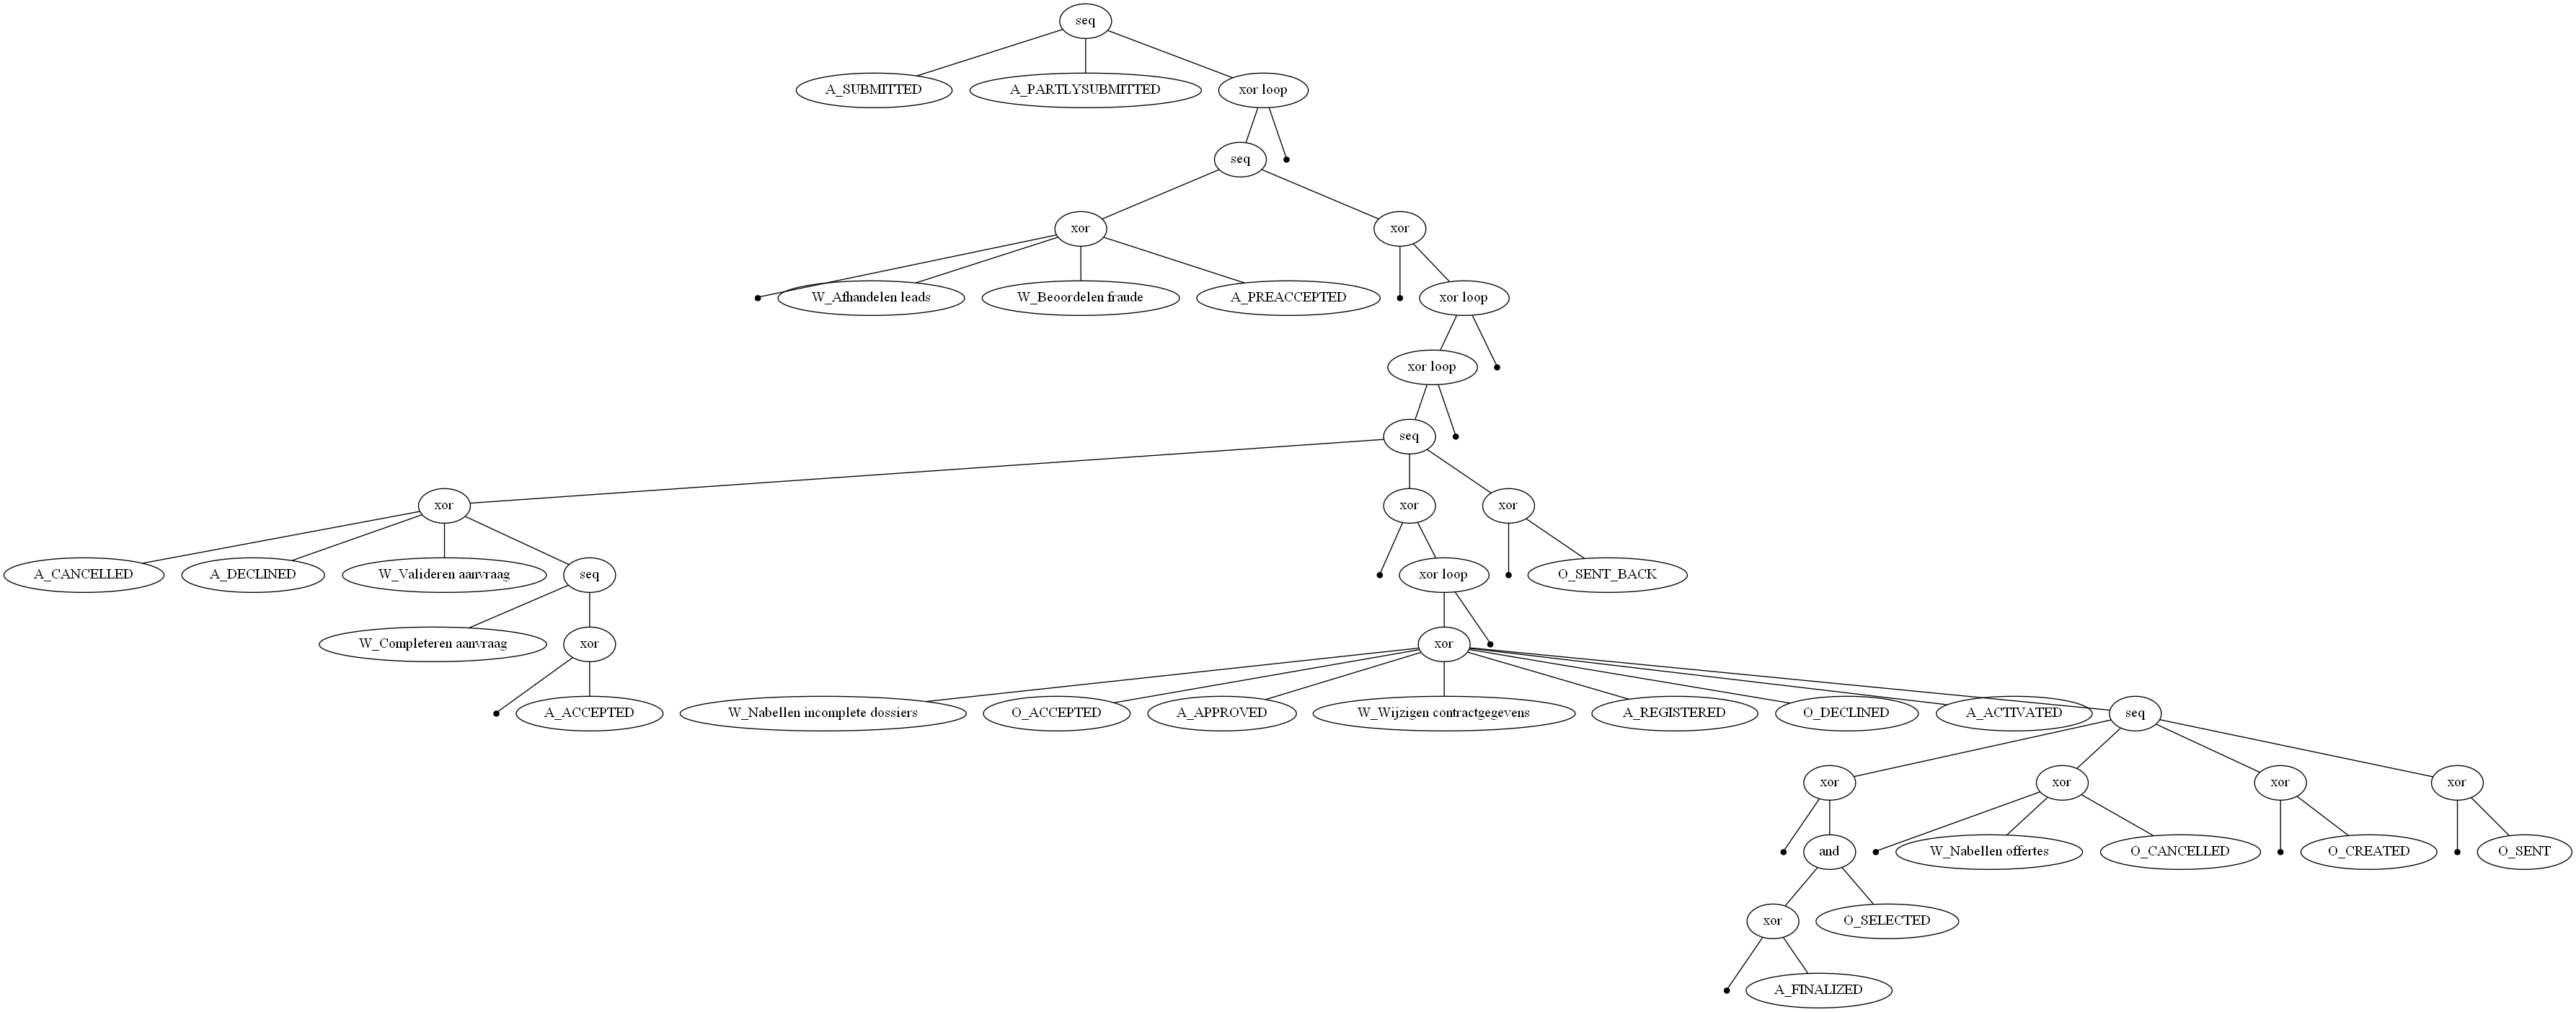

In [21]:
pm4py.view_process_tree(process_tree)

In [22]:
bpmn = pm4py.convert_to_bpmn(process_tree)

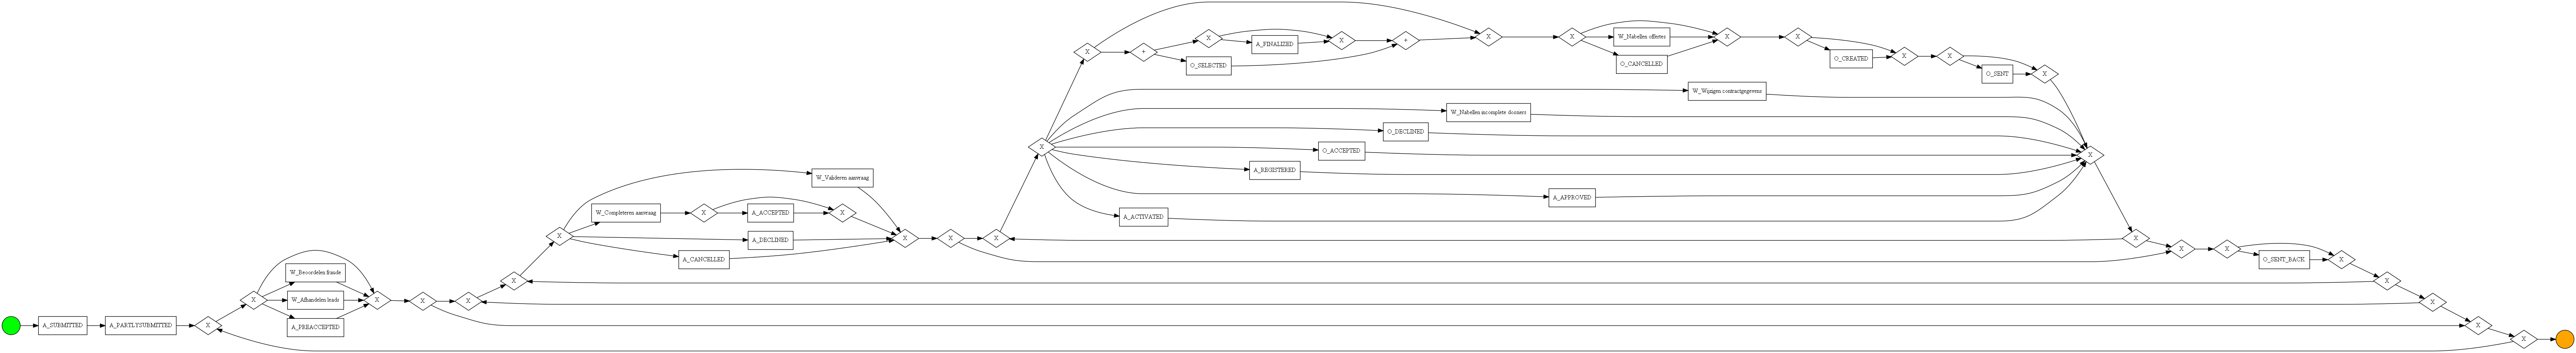

In [23]:
pm4py.view_bpmn(bpmn)

In [24]:
from pm4py.algo.analysis.woflan import algorithm as woflan
from pm4py.algo.conformance.alignments.petri_net import algorithm as alignments
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
from pm4py.algo.evaluation.generalization import algorithm as generalization_evaluator
from pm4py.algo.evaluation.simplicity import algorithm as simplicity_evaluator

def cal_measure(xes_log, petrinet, initial_marking, final_marking):
    parameters = {replay_fitness_evaluator.token_replay.Parameters.ACTIVITY_KEY: 'concept:name',
                  replay_fitness_evaluator.alignment_based.Parameters.ACTIVITY_KEY: 'concept:name',
                  woflan.Parameters.RETURN_ASAP_WHEN_NOT_SOUND: True,
                  woflan.Parameters.PRINT_DIAGNOSTICS: False, woflan.Parameters.RETURN_DIAGNOSTICS: False,
                  alignments.Parameters.SHOW_PROGRESS_BAR: False}
    is_sound = woflan.apply(petrinet, initial_marking, final_marking, parameters=parameters)
    if is_sound == True:
        fitness = replay_fitness_evaluator.apply(xes_log, petrinet, initial_marking, final_marking,
                                           parameters=parameters,
                                           variant=replay_fitness_evaluator.Variants.ALIGNMENT_BASED)
        precision = precision_evaluator.algorithm.apply(xes_log, petrinet, initial_marking, final_marking,
                                              parameters=parameters, variant=precision_evaluator.Variants.ALIGN_ETCONFORMANCE)
        f_score = 2 * ((fitness['averageFitness'] * precision) / (fitness['averageFitness'] + precision))
        print('sound')
    else:
        fitness = replay_fitness_evaluator.apply(xes_log, petrinet, initial_marking, final_marking, 
                                           parameters=parameters, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)
        precision = precision_evaluator.apply(xes_log, petrinet, initial_marking, final_marking, 
                                                  parameters=parameters, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)
        print('unsound')
    generaliz = generalization_evaluator.apply(xes_log, petrinet, initial_marking, final_marking,
                                               parameters=parameters, variant=generalization_evaluator.Variants.GENERALIZATION_TOKEN)
    simplic = simplicity_evaluator.apply(petrinet)
    f_score = 2 * ((fitness['log_fitness'] * precision) / (fitness['log_fitness'] + precision))
    print('f_score:', f_score, 'fitness:', fitness['log_fitness'], 
              'precision:', precision, 'generaliz:', generaliz, 'simplic:', simplic)


In [25]:
cal_measure(log, petri_net, initial_marking, final_marking)


unsound



f_score: 0.6244175817176321 fitness: 0.9868995787860022 precision: 0.4566813860590392 generaliz: 0.9562067611239506 simplic: 0.551912568306011


# Analisar variâncias e desempenho / tempo

In [26]:
from pm4py.algo.filtering.log.variants import variants_filter
variants = variants_filter.get_variants(log)

In [27]:
len(variants)

4366

In [28]:
from pm4py.statistics.traces.generic.log import case_statistics
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)

In [29]:
variants_count[:10]

[{'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,A_DECLINED', 'count': 3429},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_DECLINED,W_Afhandelen leads',
  'count': 1872},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,W_Afhandelen leads,A_DECLINED,W_Afhandelen leads',
  'count': 271},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W_Completeren aanvraag,W_Afhandelen leads,W_Completeren aanvraag,A_DECLINED,W_Completeren aanvraag',
  'count': 209},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_DECLINED,W_Completeren aanvraag',
  'count': 160},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,A_PREACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,A_CANCELLED,W_Completeren aanvraag',
  'count': 134},
 {'variant': 'A_SUBMITTED,A_PARTLYSUBMITTED,W_Afhandelen leads,W_Afhandelen leads,A_PREACCEPTED,W